# PCA

In [19]:
#importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
#importing the dataset

dataset=pd.read_csv("C:\\Users\\DELL\\Desktop\iris.csv")
y=dataset.iloc[:,-1].values

#normalize the dataset
D=dataset[['sepal_length','sepal_width','petal_length','petal_width']]
X=D.apply(lambda x: (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0)))
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


In [21]:
#encoding the dependent variables
from sklearn.preprocessing import LabelEncoder  
le=LabelEncoder()
y=le.fit_transform(y)

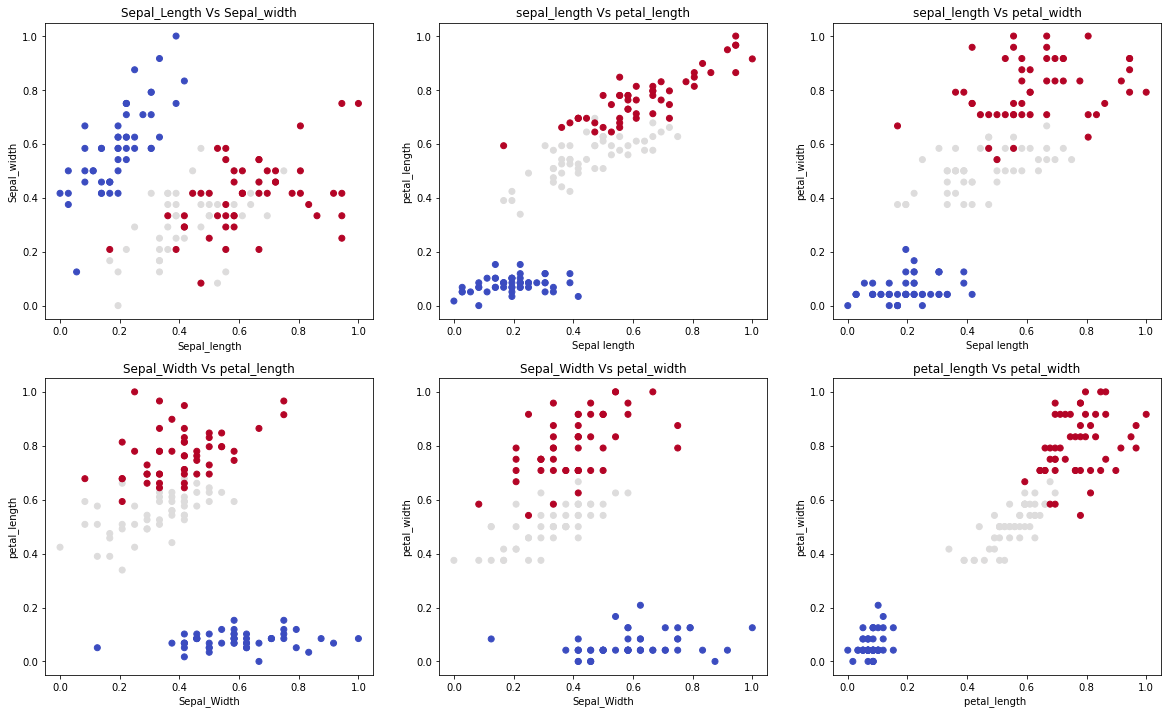

In [22]:
#scatter plots for different features 
fig, axs = plt.subplots(2, 3, figsize=(20,12))

axs[0, 0].scatter(X.iloc[:, 0:1], X.iloc[:, 1:2], c=y, cmap=plt.cm.coolwarm)
axs[0, 0].set_xlabel('Sepal_length')
axs[0, 0].set_ylabel('Sepal_width')
axs[0, 0].set_title('Sepal_Length Vs Sepal_width')

axs[0, 1].scatter(X.iloc[:, 0:1], X.iloc[:, 2:3], c=y, cmap=plt.cm.coolwarm)
axs[0, 1].set_xlabel('Sepal length')
axs[0, 1].set_ylabel('petal_length')
axs[0, 1].set_title('sepal_length Vs petal_length')

axs[0, 2].scatter(X.iloc[:, 0:1], X.iloc[:, 3:4], c=y, cmap=plt.cm.coolwarm)
axs[0, 2].set_xlabel('Sepal length')
axs[0, 2].set_ylabel('petal_width')
axs[0, 2].set_title('sepal_length Vs petal_width')

axs[1, 0].scatter(X.iloc[:, 1:2], X.iloc[:, 2:3], c=y, cmap=plt.cm.coolwarm)
axs[1, 0].set_xlabel('Sepal_Width')
axs[1, 0].set_ylabel('petal_length')
axs[1, 0].set_title('Sepal_Width Vs petal_length')

axs[1, 1].scatter(X.iloc[:, 1:2], X.iloc[:, 3:4], c=y, cmap=plt.cm.coolwarm)
axs[1, 1].set_xlabel('Sepal_Width')
axs[1, 1].set_ylabel('petal_width')
axs[1, 1].set_title('Sepal_Width Vs petal_width')

axs[1, 2].scatter(X.iloc[:, 2:3], X.iloc[:, 3:4], c=y, cmap=plt.cm.coolwarm)
axs[1, 2].set_xlabel('petal_length ')
axs[1, 2].set_ylabel('petal_width')
axs[1, 2].set_title('petal_length Vs petal_width')

plt.show()

In [23]:
#calculate mean centered data
mean=np.mean(X,axis=0)
X=X-mean

In [24]:
#calcualte covariance matrix of mean data
cov=np.cov(X.T)
cov

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [25]:
#calculate eigen values and eigen vectors
eigenvalues,eigenvectors=np.linalg.eig(cov)
print(eigenvalues)
print( eigenvectors)

[0.23231168 0.03239279 0.00963728 0.00175337]
[[ 0.4252893  -0.42100611 -0.71434339  0.36276216]
 [-0.14612219 -0.90470509  0.33510219 -0.21877734]
 [ 0.61610511  0.06432645 -0.06825927 -0.78205964]
 [ 0.64667752  0.01116485  0.61054133  0.45708076]]


In [26]:
#sort the eigenvalues in descending order
eigenvectors=eigenvectors.T
idx_sorting=np.argsort(eigenvalues)[::-1]
eigenvalues=eigenvalues[idx_sorting]
eigenvectors=eigenvectors[idx_sorting]
#select first 2 eigen vectors
components=eigenvectors[0:2]
Y=np.dot(X,components.T)

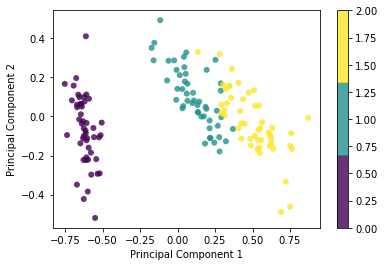

In [27]:
#two components which are
x1 = Y[:, 0]
x2 = Y[:, 1]
#visualizing the result

plt.scatter(x1, x2, c=y,edgecolor='none', alpha=0.8,cmap=plt.cm.get_cmap('viridis', 3))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()